In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/PizzaVsIcecream/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/PizzaVsIcecream/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/PizzaVsIcecream/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/PizzaVsIcecream/train/icecream')))
print(len(os.listdir('/content/drive/MyDrive/PizzaVsIcecream/test/pizza')))
print(len(os.listdir('/content/drive/MyDrive/PizzaVsIcecream/test/icecream')))

327
391
47
59


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 575 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 5s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
18/18 [==============================] - 321s 18s/step - loss: 2.4655 - accuracy: 0.5304 - val_loss: 1.6056 - val_accuracy: 0.5734
Epoch 2/3
18/18 [==============================] - 5s 291ms/step - loss: 0.7436 - accuracy: 0.7026 - val_loss: 0.5958 - val_accuracy: 0.7692
Epoch 3/3
18/18 [==============================] - 5s 280ms/step - loss: 0.5487 - accuracy: 0.7496 - val_loss: 0.6025 - val_accuracy: 0.7622


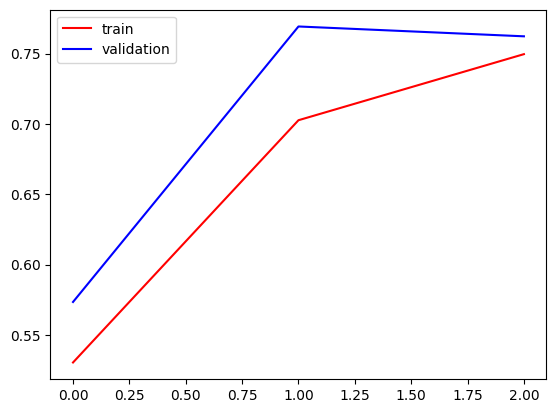

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

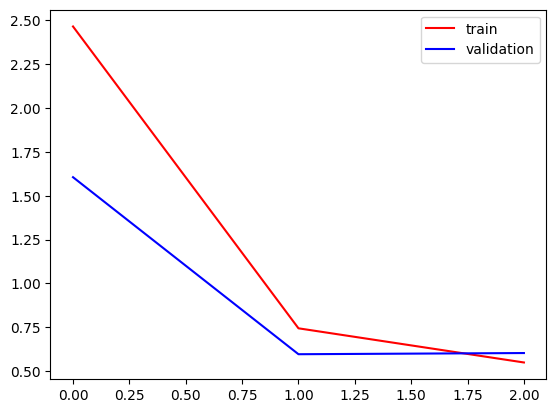

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 106 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

4/4 [==============================] - 70s 23s/step
[[0.82062906]
 [0.09175116]
 [0.16834778]
 [0.15924945]
 [0.03857357]
 [0.88831735]
 [0.04300556]
 [0.4129495 ]
 [0.15028058]
 [0.05672844]
 [0.5012441 ]
 [0.05302911]
 [0.73196447]
 [0.03891545]
 [0.04965674]
 [0.2213915 ]
 [0.42342782]
 [0.03715243]
 [0.98362124]
 [0.96229476]
 [0.85716784]
 [0.05940882]
 [0.02053873]
 [0.0552655 ]
 [0.03016732]
 [0.01288241]
 [0.13526826]
 [0.07502901]
 [0.86748385]
 [0.19074473]
 [0.01948652]
 [0.2850732 ]
 [0.02534563]
 [0.04835312]
 [0.03031089]
 [0.02526308]
 [0.80436975]
 [0.05203087]
 [0.03638507]
 [0.06444668]
 [0.06477791]
 [0.02302812]
 [0.8445979 ]
 [0.9017159 ]
 [0.2748249 ]
 [0.45340973]
 [0.02994562]
 [0.15734473]
 [0.5984261 ]
 [0.6878812 ]
 [0.05025638]
 [0.8151189 ]
 [0.01006329]
 [0.1570322 ]
 [0.01556466]
 [0.8890873 ]
 [0.15447572]
 [0.06602378]
 [0.02331901]
 [0.04965674]
 [0.08889246]
 [0.3713358 ]
 [0.0409699 ]
 [0.18614624]
 [0.02605649]
 [0.12711711]
 [0.1691288 ]
 [0.048353

In [13]:
len(predictions)

106

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[44 15]
 [36 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.75      0.63        59
           1       0.42      0.23      0.30        47

    accuracy                           0.52       106
   macro avg       0.49      0.49      0.47       106
weighted avg       0.49      0.52      0.49       106

